In [20]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def get_loader(train, batch_size):
    '''Cкачает мнист и сохранит где-то рядом.'''
    
    # Dataset в PyTorch -- это какой-то объект, который оборачивает сырые данные и делает с ними какой-нибудь препроцессинг
    dataset = datasets.MNIST('mnist', train=train, download=True,
        transform=transforms.ToTensor())
    
    # DataLoader делает из датасета генератор, который возвращает данные, сгруппированные по батчам
    loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)
    
    return loader
    
train = get_loader(True, 64)
val = get_loader(False, 64)

In [23]:
def accuracy(model, val):
    total = 0
    correct = 0
    for X, y in val:
        X = X.view(-1, 784)
        res = model(X)
        res = res.argmax(dim=1)
        total += res.shape[0]
        correct += (res == y).sum().item()
    return correct / total

In [25]:
#https://pytorch.org/docs/stable/nn.html
model = nn.Sequential(
    
    nn.Linear(784, 1500),
    nn.ReLU(),
    nn.BatchNorm1d(1500),
    nn.Dropout(0.25),            
    nn.Linear(1500, 300),
    nn.ReLU(),
    nn.BatchNorm1d(300),    
    nn.Linear(300, 10),
    nn.LogSoftmax(dim=1)
)


In [26]:
for i in (model.parameters()):
    print (i)

Parameter containing:
tensor([[ 0.0295, -0.0203,  0.0288,  ...,  0.0286,  0.0163,  0.0271],
        [ 0.0120,  0.0131,  0.0355,  ...,  0.0066, -0.0282, -0.0236],
        [ 0.0318,  0.0115,  0.0308,  ...,  0.0150,  0.0095,  0.0161],
        ...,
        [-0.0079,  0.0112,  0.0054,  ..., -0.0214,  0.0218, -0.0203],
        [ 0.0208,  0.0157,  0.0094,  ...,  0.0083, -0.0055, -0.0078],
        [-0.0241,  0.0093,  0.0264,  ...,  0.0353,  0.0134, -0.0070]],
       requires_grad=True)
Parameter containing:
tensor([ 0.0287, -0.0141,  0.0069,  ...,  0.0263,  0.0090, -0.0003],
       requires_grad=True)
Parameter containing:
tensor([0.5813, 0.1710, 0.6284,  ..., 0.0695, 0.9456, 0.7338],
       requires_grad=True)
Parameter containing:
tensor([0., 0., 0.,  ..., 0., 0., 0.], requires_grad=True)
Parameter containing:
tensor([[-0.0005,  0.0047, -0.0046,  ..., -0.0242,  0.0128,  0.0088],
        [-0.0115,  0.0183, -0.0072,  ...,  0.0057, -0.0185, -0.0041],
        [ 0.0020,  0.0168, -0.0181,  ...,  0

        0.8902, 0.7058, 0.4238], requires_grad=True)
Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [27]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = nn.NLLLoss()

In [31]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = nn.DataParallel(model)
# train = train.to(device)


In [32]:
type(train)

torch.utils.data.dataloader.DataLoader

0.96075 0.9548


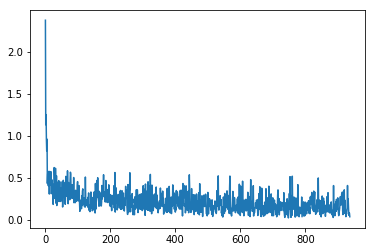

0.9691666666666666 0.9619


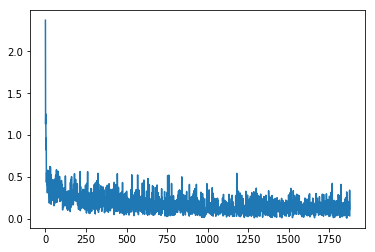

0.9729666666666666 0.9648


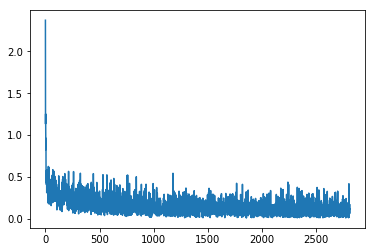

0.9688 0.9605


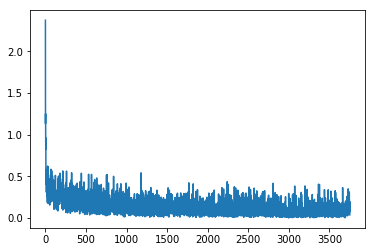

0.9769333333333333 0.967


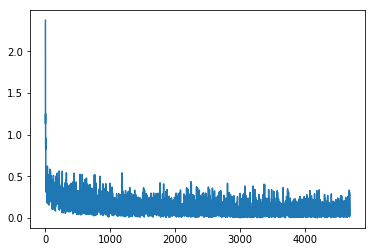

0.97865 0.9689


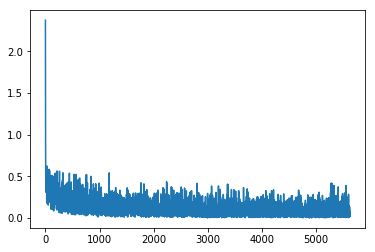

0.9810333333333333 0.969


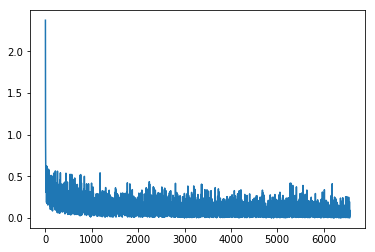

0.9847166666666667 0.9728


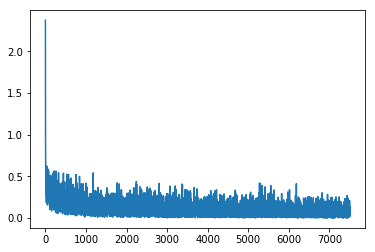

0.9846333333333334 0.9748


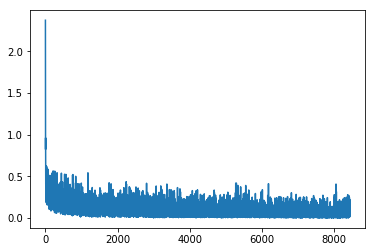

0.9854833333333334 0.9717


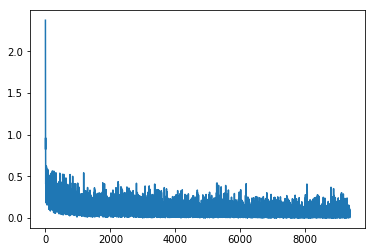

0.9836166666666667 0.9732


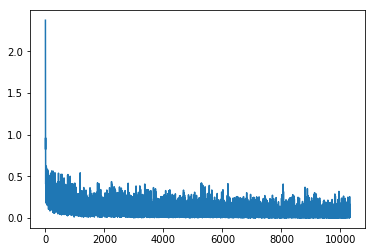

0.9871333333333333 0.9722


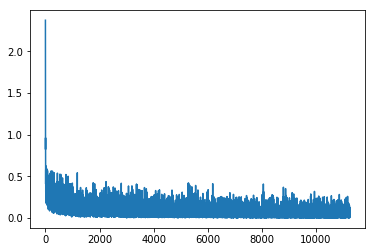

0.9869333333333333 0.9721


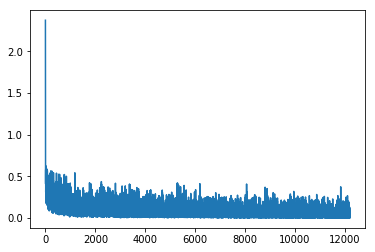

0.9864833333333334 0.9746


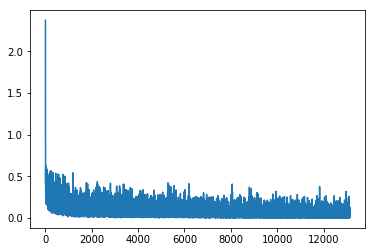

0.9902333333333333 0.9743


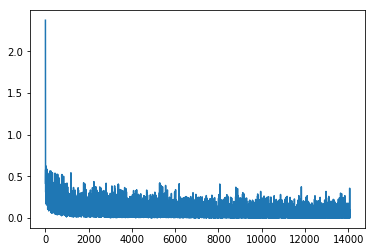

0.9856333333333334 0.9726


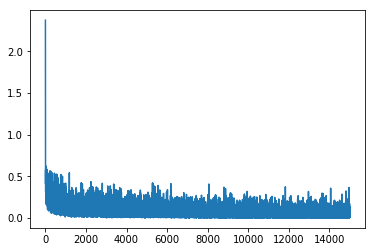

0.98865 0.9728


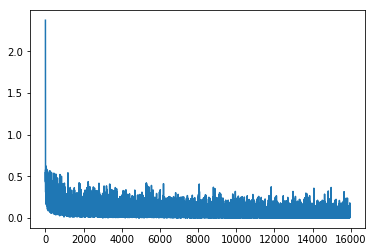

0.9888333333333333 0.9743


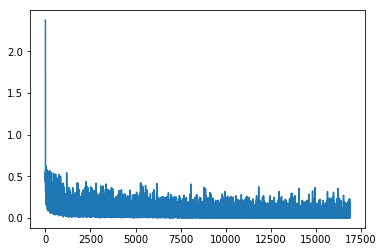

0.9909666666666667 0.9777


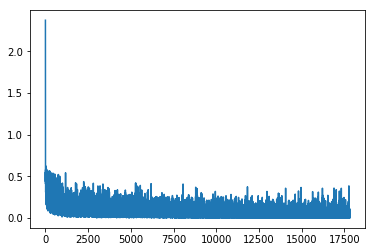

0.9904833333333334 0.9752


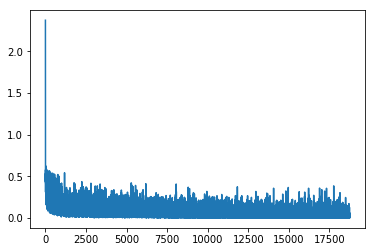

In [28]:
train_losses = []
for epoch in range(20):
    for X, y in train:
        X = X.view(-1, 784)  # разгладим картинку в вектор
        
        optimizer.zero_grad()
        
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        
        train_losses.append(loss.item())
        # как думаете, зачем нужен .item()?
        # подсказка: лосс хранит информацию о своей истории
        # попробуйте убрать .item() и посмотреть на расход памяти
        
        optimizer.step()
    
    print(accuracy(model, train), accuracy(model, val))
        
    plt.plot(train_losses)
    plt.show()